# Pima Indians Diabetes Database

## Dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases,[NIDDK](https://www.niddk.nih.gov/about-niddk/research-areas/diabetes).The objective is to predict based on diagnostic measurements whether a patient has diabetes.
The features used in this dataset are
1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

## Get Pima data

In [2]:
diab_data = pd.read_csv('pima_diabetes.csv')
diab_data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [3]:
diab_data.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


In [4]:
diab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
num_preg        768 non-null int64
glucose_conc    768 non-null int64
diastolic_bp    768 non-null int64
thickness       768 non-null int64
insulin         768 non-null int64
bmi             768 non-null float64
diab_pred       768 non-null float64
age             768 non-null int64
skin            768 non-null float64
diabetes        768 non-null bool
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.8 KB


In [5]:
diab_data['diabetes'].value_counts()

False    500
True     268
Name: diabetes, dtype: int64

## Exploratory Data Analysis

Let's visualize the data and get the analysis started!

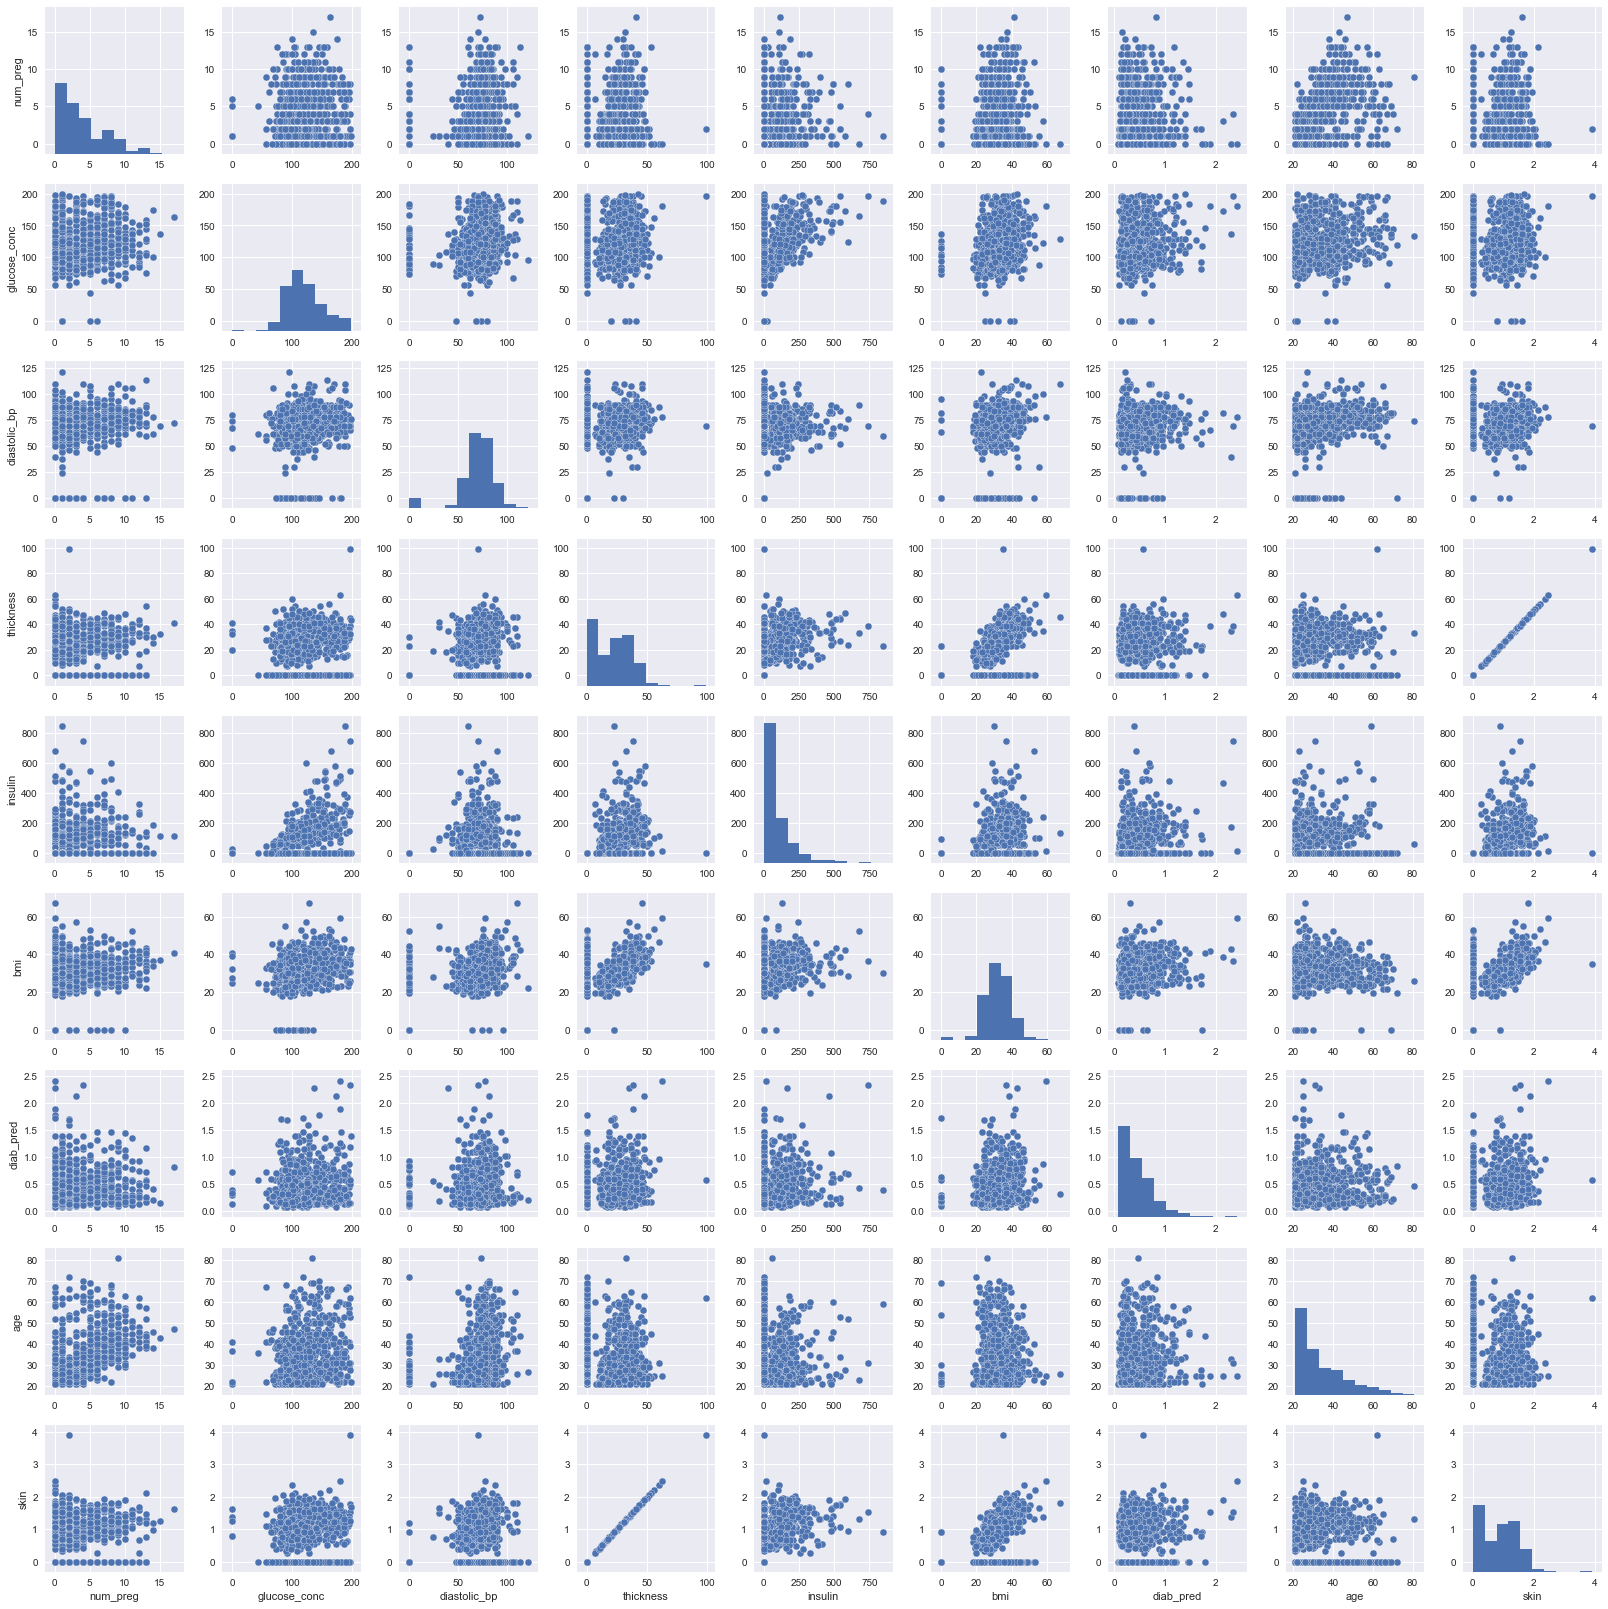

In [7]:
sns.pairplot(diab_data.iloc[:, :-1])

from the graph above, we can see the features 'thickness' and 'skin' are lineary aligned with each other. Hence we can drop one from the dataset.

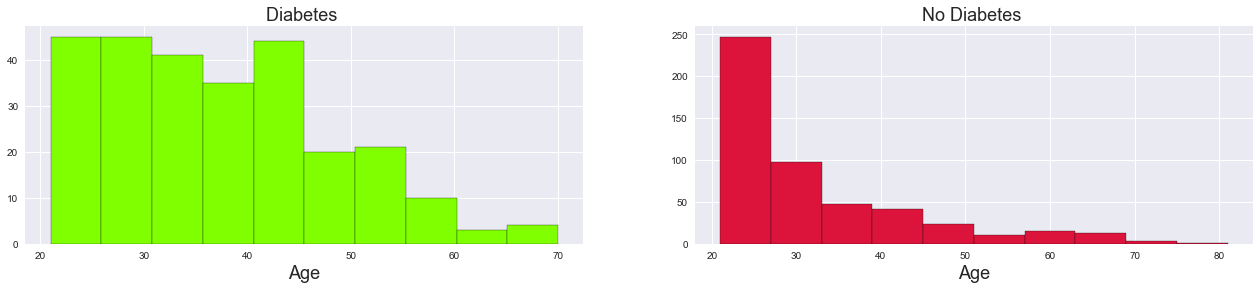

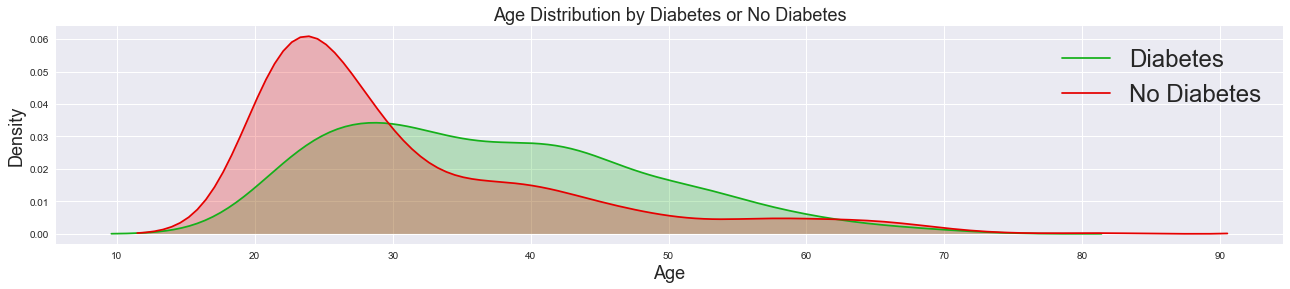

In [8]:
# Histogram
fig, ax = plt.subplots(1, 2, figsize=(22,4))
ax[0].hist(diab_data.loc[diab_data['diabetes'] == True, "age"], color = 'chartreuse', edgecolor='black')
ax[0].set_title('Diabetes ', fontsize = 18)
ax[0].set_xlabel('Age', fontsize = 18)
ax[1].hist(diab_data.loc[diab_data['diabetes'] == False, "age"], color = 'crimson', edgecolor='black')
ax[1].set_title('No Diabetes ', fontsize = 18)
ax[1].set_xlabel('Age', fontsize = 18)

# Density Plot
fig, ax = plt.subplots(figsize=(22,4))
ax = sns.kdeplot(diab_data.loc[diab_data['diabetes'] == True, "age"], shade=True, color=sns.xkcd_rgb["green"], label="Diabetes")
ax = sns.kdeplot(diab_data.loc[diab_data['diabetes'] == False, "age"], shade=True, color=sns.xkcd_rgb["red"], label="No Diabetes")
ax.set_title('Age Distribution by Diabetes or No Diabetes', fontsize = 18)
ax.set_ylabel('Density', fontsize = 18)
ax.set_xlabel('Age', fontsize = 18)
plt.legend(fontsize=24)
plt.show()

Age appears to be related to having diabetes and thus will perhaps be a good predictor...

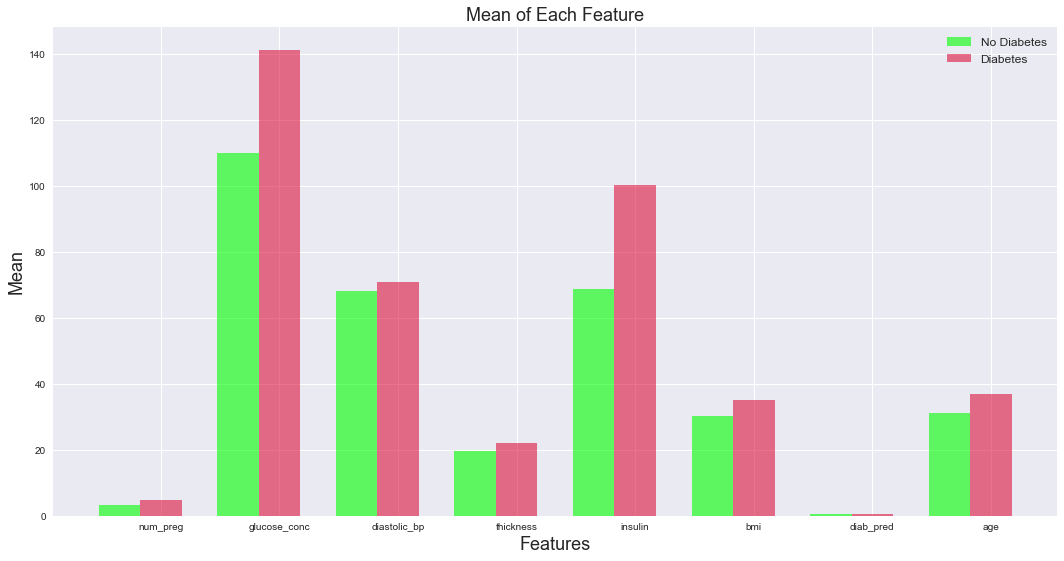

In [9]:
diabetes = diab_data.loc[diab_data['diabetes'] == True, 'num_preg': 'age'].values
no_diabetes = diab_data.loc[diab_data['diabetes'] == False, 'num_preg':'age'].values
diabetes_means = np.mean(diabetes, axis=0)
no_diabetes_means = np.mean(no_diabetes, axis=0)

features = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin','bmi', 'diab_pred', 'age']
num_features = len(features)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
index = np.arange(num_features)
bar_width = 0.35
opacity = 0.6

rects1 = ax.bar(index, no_diabetes_means, bar_width,
                 alpha=opacity,
                 color='lime',
                 label='No Diabetes')

rects2 = ax.bar(index + bar_width, diabetes_means, bar_width,
                 alpha=opacity,
                 color='crimson',
                 label='Diabetes')

ax.set_xlabel('Features', fontsize=18)
ax.set_ylabel("Mean", fontsize=18)
ax.set_title('Mean of Each Feature', fontsize=18)
#set_tick_labels(ax)
plt.setp(ax, xticks=[i+bar_width for i in index],xticklabels=features)
ax.legend(fontsize=12)
plt.show()

In [10]:
df_new = diab_data.drop('skin',axis=1)

In [11]:
df_new.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'diabetes'],
      dtype='object')

In [12]:
# there are '0' values present in the dataset, we can replace those with mean of the values from each column.
# to do that we have to 1st mask '0' values with NaN

df_new = df_new.replace(0,np.nan)


df_new.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,True
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,False
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,True
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,False
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,True


In [13]:
df_new['insulin'].describe()

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: insulin, dtype: float64

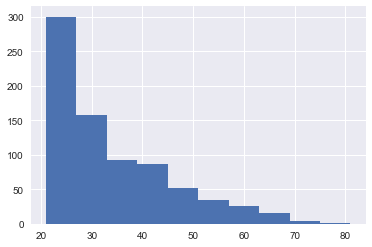

In [14]:
# plot age
fig, ax = plt.subplots()
ax.hist(df_new["age"])
plt.show()

In [15]:
df_new['age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: age, dtype: float64

##### from the above information it is clear that the age of 75% of patients is below 41 years

## Imput the '0' values 

In [16]:
from sklearn.preprocessing import Imputer

fill_nan = Imputer(missing_values=np.nan, strategy="mean", axis=0)


In [17]:
df_new.loc[df_new["age"] < 40, "insulin"] = fill_nan.fit_transform(df_new.loc[df_new["age"] < 40, "insulin"].values.reshape(-1, 1))

#for 'glucose_conc'
df_new.loc[df_new["age"] < 40, "glucose_conc"] = fill_nan.fit_transform(df_new.loc[df_new["age"] < 40, "glucose_conc"].values.reshape(-1, 1))

#for 'diastolic_bp'
df_new.loc[df_new["age"] < 40, "diastolic_bp"] = fill_nan.fit_transform(df_new.loc[df_new["age"] < 40, "diastolic_bp"].values.reshape(-1, 1))

#for 'thickness'
df_new.loc[df_new["age"] < 40, "thickness"] = fill_nan.fit_transform(df_new.loc[df_new["age"] < 40, "thickness"].values.reshape(-1, 1))

#for 'bmi'
df_new.loc[df_new["age"] < 40, "bmi"] = fill_nan.fit_transform(df_new.loc[df_new["age"] < 40, "bmi"].values.reshape(-1, 1))

#for 'diab_pred'
df_new.loc[df_new["age"] < 40, "diab_pred"] = fill_nan.fit_transform(df_new.loc[df_new["age"] < 40, "diab_pred"].values.reshape(-1, 1))


In [18]:
df_new.loc[df_new["age"] > 40, "insulin"] = fill_nan.fit_transform(df_new.loc[df_new["age"] > 40, "insulin"].values.reshape(-1, 1))

#for 'glucose_conc'
df_new.loc[df_new["age"] > 40, "glucose_conc"] = fill_nan.fit_transform(df_new.loc[df_new["age"] > 40, "glucose_conc"].values.reshape(-1, 1))

#for 'diastolic_bp'
df_new.loc[df_new["age"] > 40, "diastolic_bp"] = fill_nan.fit_transform(df_new.loc[df_new["age"] > 40, "diastolic_bp"].values.reshape(-1, 1))

#for 'thickness'
df_new.loc[df_new["age"] > 40, "thickness"] = fill_nan.fit_transform(df_new.loc[df_new["age"] > 40, "thickness"].values.reshape(-1, 1))

#for 'bmi'
df_new.loc[df_new["age"] > 40, "bmi"] = fill_nan.fit_transform(df_new.loc[df_new["age"] > 40, "bmi"].values.reshape(-1, 1))

#for 'diab_pred'
df_new.loc[df_new["age"] > 40, "diab_pred"] = fill_nan.fit_transform(df_new.loc[df_new["age"] > 40, "diab_pred"].values.reshape(-1, 1))


In [19]:
df_new.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6.0,148.0,72.0,35.000000,201.242857,33.6,0.627,50,True
1,1.0,85.0,66.0,29.000000,145.468553,26.6,0.351,31,False
2,8.0,183.0,64.0,28.501188,145.468553,23.3,0.672,32,True
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21,False
4,NaN,137.0,40.0,35.000000,168.000000,43.1,2.288,33,True


In [20]:
df_new.isnull().sum()

num_preg        111
glucose_conc      0
diastolic_bp      1
thickness         4
insulin           7
bmi               0
diab_pred         0
age               0
diabetes          0
dtype: int64

In [21]:
df_new = df_new.replace(np.nan,0)

In [22]:
df_new.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
diabetes        0
dtype: int64

## Machine Learning
### Train/Test split

In [23]:
df_new.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'diabetes'],
      dtype='object')

In [24]:
X = df_new[['glucose_conc', 'diastolic_bp', 'thickness', 'insulin','bmi', 'diab_pred', 'age']].values

y = df_new['diabetes'].map({False:0, True:1}).values

In [25]:
# split dataset into test/train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

### Gridsearch

Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes.
It is possible and recommended to search the hyper-parameter space for the best cross validation score.

In [26]:
from sklearn.model_selection import GridSearchCV

#### Creating the grid parameters

In [27]:
# Logistic Regression
log_param = {'C':[1,10,100,1000]}

# k-Nearest Neighbor
knn_param = {'n_neighbors': [1,5,25,30,35]}

# Support Vector Machine
svm_param =[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},{'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']},] 

# Random Forest (ensemble of Decision Trees)
forest_param = {'n_estimators': [1,5,25,30,35]}


#### Creating grid

In [28]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_grid = GridSearchCV(LogisticRegression(),log_param,refit=True)

# k-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn_grid = GridSearchCV(KNeighborsClassifier(),knn_param,refit=True)

# Support Vector Machine
from sklearn.svm import SVC
svm = SVC()

svm_grid = GridSearchCV(SVC(),svm_param,refit=True)

# Random Forest (ensemble of Decision Trees)
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

forest_grid = GridSearchCV(RandomForestClassifier(),forest_param,refit=True)


#### Fit the grid model

In [29]:
# Logistic Regression
log_grid.fit(X_train,y_train)

# k-Nearest Neighbor
knn_grid.fit(X_train,y_train)

# Support Vector Machine
svm_grid.fit(X_train,y_train)

# Random Forest (ensemble of Decision Trees)
forest_grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 5, 25, 30, 35]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### Best parameters

In [30]:
# Logistic Regression
print('The best parameter for Logistic Regression is {}'.format(log_grid.best_params_))

# k-Nearest Neighbor
print('The best parameter for k-Nearest Neighbor is {}'.format(knn_grid.best_params_))

# Support Vector Machine
print('The best parameter for Support Vector Machine is {}'.format(svm_grid.best_params_))

# Random Forest (ensemble of Decision Trees)
print('The best parameter for Random Forest is {}'.format(forest_grid.best_params_))


The best parameter for Logistic Regression is {'C': 10}
The best parameter for k-Nearest Neighbor is {'n_neighbors': 30}
The best parameter for Support Vector Machine is {'C': 10, 'kernel': 'linear'}
The best parameter for Random Forest is {'n_estimators': 30}


In [31]:
# Logistic Regression
log_grid.best_estimator_

# k-Nearest Neighbor
knn_grid.best_estimator_

# Support Vector Machine
svm_grid.best_estimator_

# Random Forest (ensemble of Decision Trees)
forest_grid.best_estimator_


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Models
* We will create all the 5 models

In [32]:
# Logistic Regression
log_reg = LogisticRegression(C = 10)

# k-Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors=30)

# Support Vector Machine
svm = SVC(kernel='linear', C=10)

# Random Forest (ensemble of Decision Trees)
forest = RandomForestClassifier(n_estimators=30)

# Neural Network
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()

### Cross Validation

In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, X_train, y_train, scoring='accuracy', cv=10)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())               # accuracy measure
    print("Standard deviation:", scores.std())  # std measures how precise the measure is

In [34]:
# create the classifier 
classifiers = [log_reg, knn, svm, forest, nn]

model_scores = []
for clf in classifiers:
    model_scores.append(cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=10))

In [35]:
models_df = pd.DataFrame(model_scores, columns=[1,2,3,4,5,6,7,8,9,10],
                               index=["LR", "KNN", "SVM", "Forest", "NN"])

models_df["Mean"] = models_df.mean(axis=1)
models_df

,1,2,3,4,5,6,7,8,9,10,Mean
LR,0.709091,0.709091,0.836364,0.777778,0.773585,0.754717,0.716981,0.716981,0.754717,0.773585,0.752289
KNN,0.618182,0.763636,0.800000,0.759259,0.735849,0.735849,0.698113,0.698113,0.735849,0.754717,0.729957
SVM,0.709091,0.727273,0.800000,0.796296,0.792453,0.792453,0.754717,0.735849,0.754717,0.792453,0.765530
Forest,0.654545,0.745455,0.800000,0.722222,0.792453,0.754717,0.716981,0.792453,0.735849,0.735849,0.745052
NN,0.636364,0.709091,0.709091,0.703704,0.754717,0.735849,0.641509,0.679245,0.660377,0.679245,0.690919


### Boxplot for cross-validation

Text(0.5,1,'Classification Accuracy using All Features')

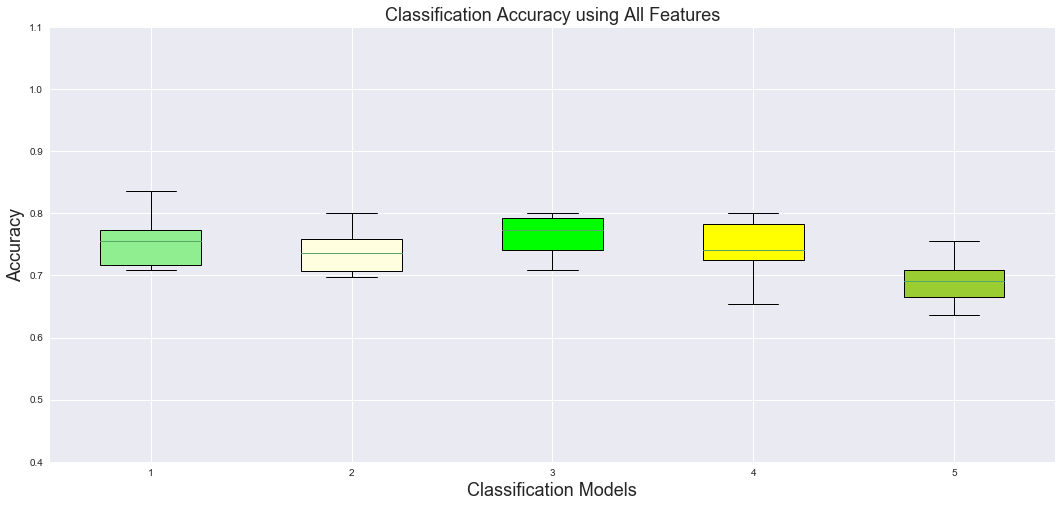

In [36]:
# BOXPLOT comparing models and comparing SVM using different feature subsets
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))
# rectangular box plot
bplot_models = axes.boxplot(model_scores, vert=True, patch_artist=True)

# fill with colors - Models
colors_d = ["lightgreen", "lightyellow", "lime", "yellow", "yellowgreen"]
for patch, color in zip(bplot_models['boxes'], colors_d):
    patch.set_facecolor(color)
    
    # adding axes labels
axes.yaxis.grid(True)
axes.set_xticks([y+1 for y in range(len(model_scores))])
axes.set_xlabel('Classification Models', fontsize=18)
axes.set_ylabel('Accuracy', fontsize=18)
axes.set_ylim((.4, 1.1))
axes.set_title('Classification Accuracy using All Features', fontsize = 18)

*1=LR, 2=KNN, 3=SVM, 4=Forest, 5=NN*

### Confusion Matrix and Classification Report

In [37]:
#fit the model
svm.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
# understand the predication
prediction = svm.predict(X_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(confusion_matrix(y_test,prediction))

[[131  15]
 [ 36  49]]


In [41]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.78      0.90      0.84       146
          1       0.77      0.58      0.66        85

avg / total       0.78      0.78      0.77       231



Text(0,0.5,'true label')

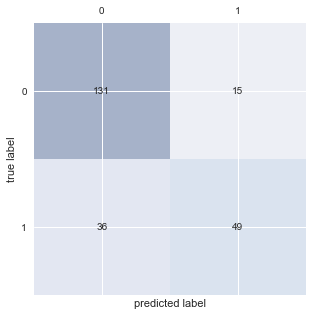

In [42]:
confmat = confusion_matrix(y_test,prediction)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

In [44]:
print("Accuracy on training set: {:.2f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svm.score(X_test, y_test)))

Accuracy on training set: 0.76
Accuracy on test set: 0.78
